A solution to https://www.lesswrong.com/s/gDiScDuMrWNpzwNSJ/p/Y9FcNzWqczbfqcPQ3.

In [12]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
url = "https://raw.githubusercontent.com/H-B-P/d-and-d-sci-II/main/d_and_d_II.csv"
df = pd.read_csv(url)

In [13]:
print(df)

                 Item name Glow color  Thaumometer reading  \
0     Warhammer of Rage +1     yellow                   40   
1     Amulet of Melancholy      green                   40   
2    Amulet of Abstraction       blue                   71   
3          Ring of Hope +6     yellow                   50   
4       Warhammer of Flame       blue                    4   
..                     ...        ...                  ...   
831  Longsword of Wrath +3       blue                   33   
832      Amulet of Rage +2      green                   28   
833    Pendant of Power +5        red                   38   
834     Amulet of Wounding       blue                   71   
835  Ring of Protection +3     yellow                   25   

     Mana gained from sacrifice  
0                            18  
1                            20  
2                            48  
3                            19  
4                             5  
..                          ...  
831              

After reading the data, I look for ways we can group data points in a useful way. Plotting Thaumometer against Mana seems like the best plot, but I can do this for various subsets of all items to gain more information.

Option 1: Colour of glow. Seems obvious enough.

Option 2: Type of Item; we have weapons (Warhammers, Longswords), jewellery (Rings, Amulets), and tools? (Axe, Plough) - bear in mind that my classes might not be quite right; might consider all names seperately.

Option 3: Adjective of Item; seems weird and hard to use

Option 4: "+x" number of Item.

In [15]:
df.columns = ['Name','Glow','Thaumometer','Mana']

In [18]:
y = df[df.Glow == 'yellow']
g = df[df.Glow == 'green']
b = df[df.Glow == 'blue']
r = df[df.Glow == 'red']

<AxesSubplot:xlabel='Thaumometer', ylabel='Mana'>

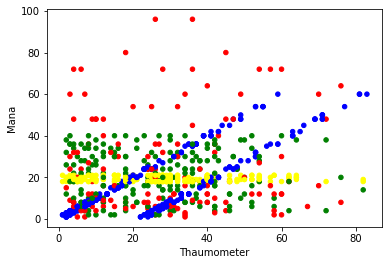

In [19]:
df.plot.scatter(x='Thaumometer',y='Mana',c='Glow')

Well, this is informative. Let's re-plot on 4 seperate graphs for legibility.

<AxesSubplot:xlabel='Thaumometer', ylabel='Mana'>

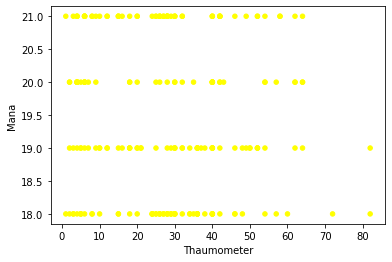

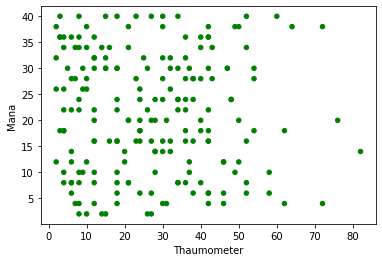

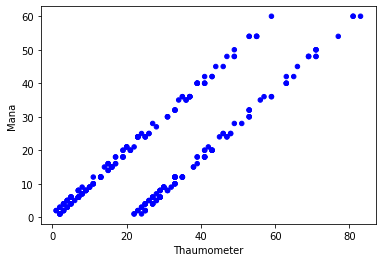

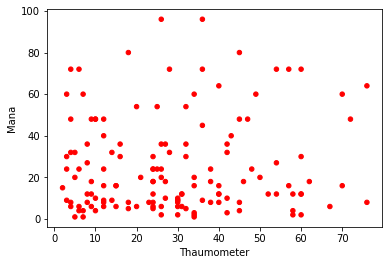

In [22]:
y.plot.scatter(x='Thaumometer',y='Mana',c='Glow')
g.plot.scatter(x='Thaumometer',y='Mana',c='Glow')
b.plot.scatter(x='Thaumometer',y='Mana',c='Glow')
r.plot.scatter(x='Thaumometer',y='Mana',c='Glow')

Now, let's break down by item type. I will repeat the multicoloured plot above, but consider only Rings, Amulets and Pendants

In [35]:
jewellery = df[df.Name.str.startswith('Ring') | df.Name.str.startswith('Amulet') | df.Name.str.startswith('Pendant')]

<AxesSubplot:xlabel='Thaumometer', ylabel='Mana'>

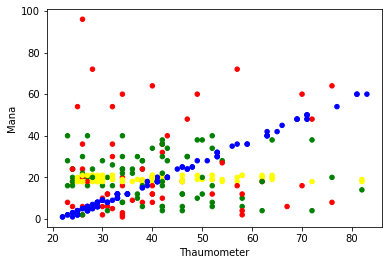

In [36]:
jewellery.plot.scatter(x='Thaumometer',y='Mana',c='Glow')

<AxesSubplot:xlabel='Thaumometer', ylabel='Mana'>

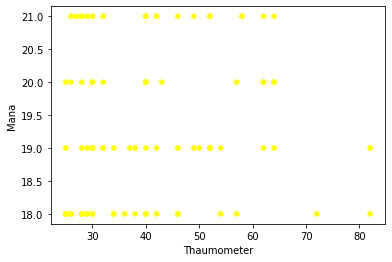

In [37]:
yj = jewellery[jewellery.Glow == 'yellow']
yj.plot.scatter(x='Thaumometer',y='Mana',c='Glow')

If I consider Rings and Amulets, I get the 'worse' of the two blue lines, and everything else is seemingly random (and I get all 4 possible mana values for yellow items). Now for Ploughs and Axes.

<AxesSubplot:xlabel='Thaumometer', ylabel='Mana'>

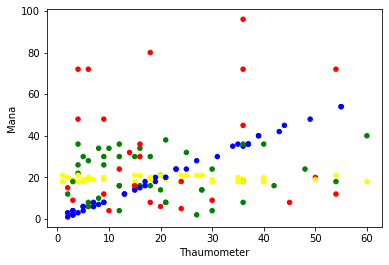

In [39]:
tools = df[df.Name.str.startswith('Plough') | df.Name.str.startswith('Axe') | df.Name.str.startswith('Saw')]
tools.plot.scatter(x='Thaumometer',y='Mana',c='Glow')

The 'better' blue line, all else as expected.

<AxesSubplot:xlabel='Thaumometer', ylabel='Mana'>

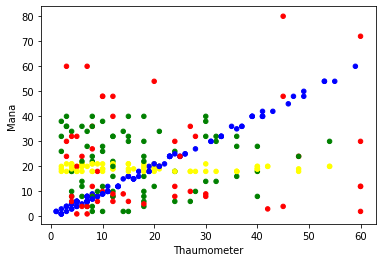

In [41]:
weapons = df[df.Name.str.startswith('Longsword') | df.Name.str.startswith('Sword') | df.Name.str.startswith('Battleaxe') | df.Name.str.startswith('Warhammer') | df.Name.str.startswith('Hammer')]
weapons.plot.scatter(x='Thaumometer',y='Mana',c='Glow')

Weapons and Tools look very similar, especially in Blue and Yellow items, which are most consistently good - I may have miscategorised Hammers and Axes, but it doesn't matter.

I now consider my list of items that I can buy. 3 are yellow, and 4 are blue.

Of my blue ones, I can get ~35 mana for 35g from "Hammer of Capabililty", ~7 mana for 23g from "Battleaxe of Glory", ~9 from 32g from "Ring of Joy +5", and ~57 from 34g from "Pendant of Hope".

Of my yellow ones, I get ~20 mana from each, and they cost 35g, 41g, and 65g.

I need to get to 120 gold. 

"Pendant of Hope", "Hammer of Capability", and the two cheapest yellow items gets me to ~132 mana, which is above 120 by a safety margin. This costs 145 gold, which is good.

It is possible I can do better (by 9 gold), exchanging a yellow item for the Ring of Joy; this seems likely to succeed, but ~100% change of 55g profit seems better than ~65% chance of 64g profit, and ~35% chance of 136g loss. I could also exchange a yellow item for the Battleaxe of Glory; this seems unlikely to work.

I could also potentitally do much better by finding a pattern in the red or green items (perhaps based on the +x modifier or adjective), but this might not work, and is not worth my time.

<h2>Final answer:</h2>

Pendant of Hope

Hammer of Capability

Plough of Plenty

Warhammer of Justice +1